In [1]:
from headers import *
%matplotlib notebook

In [2]:
cd ../../Data/Cornell_Data/Subject1_annotations/GT_SEG/

/home/tanmay/Research/Code/ActionPrimitives/Data/Cornell_Data/Subject1_annotations/GT_SEG


In [3]:
subaction_list = npy.load("Subaction_List.npy")
seg_list = npy.load("Segment_Label_List.npy")
num_seqments = npy.load("Number_Segment_Instances.npy")
segs = npy.load("ALIGNED_GT_SEGMENTS.npy")
labels = npy.load("ALIGNED_SEG_LABELS.npy")

In [4]:
cd ../../Primitive_Library/Subject1/Resolved_Trajectories/

/home/tanmay/Research/Code/ActionPrimitives/Data/Cornell_Data/Primitive_Library/Subject1/Resolved_Trajectories


In [5]:
lhr = npy.load("LH_Resolved.npy")
lhsmooth = npy.load("LH_Smooth.npy")
lhshoulder = npy.load("LH_Hand_Shoulder_Resolved.npy")
lhsmooth[13].shape

(648, 3)

In [6]:
cd ../Object_Coordinates/

/home/tanmay/Research/Code/ActionPrimitives/Data/Cornell_Data/Primitive_Library/Subject1/Object_Coordinates


In [18]:
# objc = [npy.load("Trajectory_Object_Coordinates_{0}.npy".format(i)) for i in range(31)]
objc = npy.load("Smoothed_Object_Coords.npy")
objc[13].shape

(2, 648, 3)

In [8]:
# tfl = npy.load("Traj_File_List.npy")
# 13,14,15 are microwaving food, which we will consider.

In [9]:
consider_trajectories = [13,14,15]
consider_movement = 'reaching'

In [10]:
# lh_obj_res = [[[] for j in range(2)] for i in range(len(consider_trajectories))]
# print(lh_obj_res)
# for k in range(len(consider_trajectories)):
#     i = consider_trajectories[k]
#     for j in range(2):
#         print(i,j)
#         print(objc[i][j].shape,lhr[i].shape)
#         lh_obj_res[k][j] = lhr[i] - objc[i][j]    
# len(lh_obj_res[0][0][0]),lh_obj_res[0][0][0].shape

In [11]:
segs[consider_trajectories],labels[consider_trajectories]

(array([[1, 50, 91, 240, 291, 421, 491, 536, 620, 645, 648],
        [1, 56, 111, 266, 301, 441, 505, 524, 618, 675],
        [1, 50, 80, 220, 249, 371, 423, 439, 531, 569, 581]], dtype=object),
 array([ ['null', 'reaching', 'opening', 'reaching', 'moving', 'placing', 'reaching', 'closing', 'null', 'null', 'null'],
        ['null', 'null', 'reaching', 'opening', 'reaching', 'moving', 'placing', 'reaching', 'closing', 'null'],
        ['closing', 'null', 'null', 'reaching', 'opening', 'reaching', 'moving', 'placing', 'null', 'closing', 'null']], dtype=object))

In [12]:
consider_segs = []
for i in consider_trajectories:
    for j in range(len(segs[i])):
#         print(labels[i][j])
        
        if labels[i][j]==consider_movement:
            print(i,j)
            consider_segs.append([i,j])

(13, 1)
(13, 3)
(13, 6)
(14, 2)
(14, 4)
(14, 7)
(15, 3)
(15, 5)


In [13]:
consider_segs, consider_trajectories

([[13, 1], [13, 3], [13, 6], [14, 2], [14, 4], [14, 7], [15, 3], [15, 5]],
 [13, 14, 15])

In [14]:
dmp_segs = [[DMP(500) for j in range(6)] for i in range(8)]

In [53]:
# dmp_segs = [[DMP(500) for j in range(6)] for i in range(8)]
# MUST LEARN DMPS OVER: LH_RESOLVED_WRT_SHOULDER: lhr, LH_RESOLVED_WRT_OBJECTS: lh_obj_res, LH_ORIGINAL: lh_smooth, OBJECTS: objc

pos_roll = [[] for i in range(8)]
init_vels = npy.zeros((8,3))

for i in range(len(consider_segs)):
    t1 = segs[consider_segs[i][0]][consider_segs[i][1]]
    t2 = segs[consider_segs[i][0]][consider_segs[i][1]+1]
    traj_ind = consider_segs[i][0]
    print(i,t1,t2,traj_ind)
    
    # FIRST ORIGINAL TRAJECTORY
    pos = lhsmooth[traj_ind][t1:t2]
    dmp_segs[i][0].smooth_interpolate(pos)
    
    # LH_RESOLVED WRT SHOULDER
    pos = lhshoulder[traj_ind][t1:t2]
    dmp_segs[i][1].smooth_interpolate(pos)
    
    # WRT OBJECTS:
    pos = lhr[traj_ind][0][t1:t2]
    dmp_segs[i][2].smooth_interpolate(pos)
    
    # WRT OBJECTS:
    pos = lhr[traj_ind][1][t1:t2]
    dmp_segs[i][3].smooth_interpolate(pos)
    pos_roll[i] = copy.deepcopy(pos)    
    
    
    # OBJECTS THEMSELVES:
    pos = objc[traj_ind][0][t1:t2]
    dmp_segs[i][4].smooth_interpolate(pos)
    
    # OBJECTS THEMSELVES:
    pos = objc[traj_ind][1][t1:t2]
    dmp_segs[i][5].smooth_interpolate(pos)
    

(0, 50, 91, 13)
(1, 240, 291, 13)
(2, 491, 536, 13)
(3, 111, 266, 14)
(4, 301, 441, 14)
(5, 524, 618, 14)
(6, 220, 249, 15)
(7, 371, 423, 15)


In [16]:
list6 = ['original','shoulder','res_obj1','res_obj2','obj1','obj2']

In [16]:
for i in range(len(consider_segs)):
    for j in range(6):
#         dmp_segs[i][j].initialize_variables()
        dmp_segs[i][j].learn_DMP()

DMP_Segment.py:99: RuntimeWarning: invalid value encountered in double_scalars


In [17]:
for i in range(len(consider_segs)):
    for j in range(6):
        dmp_segs[i][j].rollout(npy.zeros(3),npy.ones(3),npy.zeros(3))

In [ ]:
def move_files(i,j):
    os.mkdir("Traj_{0}_Seg_{1}".format(i,j))
    
for i in range(len(consider_segs)):
    for j in range(6):

In [29]:
for i in range(len(consider_segs)):
    print(segs[consider_segs[i][0]][consider_segs[i][1]],segs[consider_segs[i][0]][consider_segs[i][1]+1])

(50, 91)
(240, 291)
(491, 536)
(111, 266)
(301, 441)
(524, 618)
(220, 249)
(371, 423)


In [16]:
cd ../../HOLDOUT/

/home/tanmay/Research/Code/ActionPrimitives/Data/Cornell_Data/Primitive_Library/HOLDOUT


In [50]:
# pos = [[[] for j in range(6)] for i in range(8)]
j=2
pos = [[] for i in range(8)]
for i in range(8):
    pos[i] = npy.load("Segment_{0}_{1}/roll_pos.npy".format(i,list6[j]))

In [24]:
# for i in range(8):
#     for j in range(6):
#         os.rename("Traj_{0}_Seg_{1}/".format(i,j),"Segment_{0}_{1}".format(i,list6[j]))

<IPython.core.display.Javascript object>


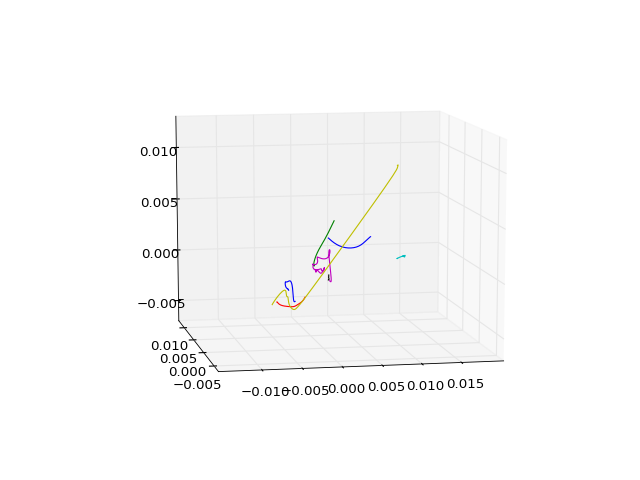

In [67]:
fig = plt.figure()
ax = fig.gca(projection='3d')

In [27]:
consider_segs,pos[0].shape

([[13, 1], [13, 3], [13, 6], [14, 2], [14, 4], [14, 7], [15, 3], [15, 5]],
 (500, 3))

In [70]:
j=3
for i in range(8):
#     ax.plot(pos[i][:,0],pos[i][:,1],pos[i][:,2])
    ax.plot(dmp_segs[i][j].demo_pos[:,0],dmp_segs[i][j].demo_pos[:,1],dmp_segs[i][j].demo_pos[:,2])
pos

array([[ 0.00696048,  0.0028006 ,  0.02569012],
       [ 0.00702044,  0.00279698,  0.02576907],
       [ 0.00705578,  0.0027927 ,  0.02576658],
       [ 0.00706944,  0.0027859 ,  0.02568557],
       [ 0.00706659,  0.0027756 ,  0.02553443],
       [ 0.0070544 ,  0.00276208,  0.02532872],
       [ 0.00704096,  0.00274675,  0.02509084],
       [ 0.00703401,  0.00273163,  0.02484727],
       [ 0.00703956,  0.00271866,  0.02462387],
       [ 0.00706116,  0.00270899,  0.02444102],
       [ 0.00709981,  0.0027026 ,  0.02431058],
       [ 0.00715442,  0.00269838,  0.02423518],
       [ 0.0072224 ,  0.00269448,  0.02420957],
       [ 0.00730001,  0.002689  ,  0.0242225 ],
       [ 0.0073825 ,  0.00268062,  0.02425901],
       [ 0.00746444,  0.00266906,  0.02430283],
       [ 0.00754047,  0.00265524,  0.02433939],
       [ 0.00760632,  0.00264106,  0.0243591 ],
       [ 0.00765996,  0.00262888,  0.02435993],
       [ 0.00770196,  0.00262086,  0.02434797],
       [ 0.00773486,  0.0026184 ,  0.024

In [45]:
plt.show()

<IPython.core.display.Javascript object>


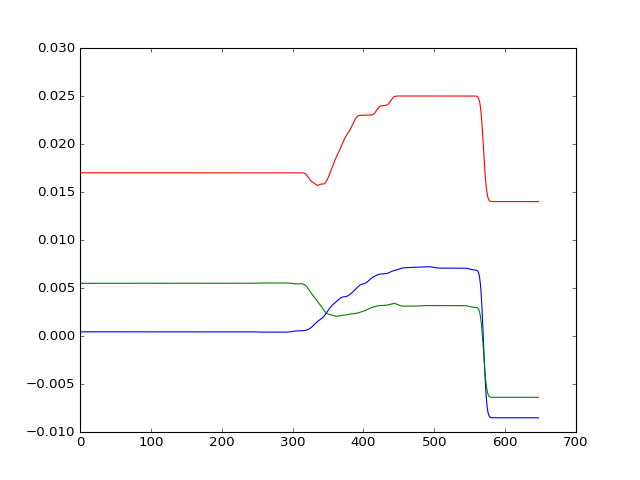

In [20]:
tr = range(648)
plt.plot(tr,objc[13][1])
# plt.plot(tr,objc[13][0])
plt.show()

In [25]:
cd ../../../HOLDOUT/

/home/tanmay/Research/Code/ActionPrimitives/Data/Cornell_Data/Primitive_Library/HOLDOUT


In [43]:
# LOAD WEIGHTS FOR HOLDOUT
j=3
# weights = [[] for i in range(8)]
weights = npy.zeros((8,100,3))
# pos = npy.zeros((8,500,3))
for i in range(8):
    weights[i] = npy.load("Segment_{0}_{1}/force_weights.npy".format(i,list6[j]))
    

In [58]:

for i in range(8):
    init_vels[i] = npy.load("Segment_{0}_{1}/roll_vel.npy".format(i,list6[j]))[0,:]
# init_vels[i] = dmp_segs[i][3].demo_vel[0,:]

In [50]:
x = [i for i in range(8) if i not in [3]]
x
# weights[x].mean(axis=0)


[0, 1, 2, 4, 5, 6, 7]

In [51]:
# HOLDOUT:
hold_centroids = [[] for i in range(8)]
for i in range(8):
    hold_centroids[i] = weights[[x for x in range(8) if x not in [i]]].mean(axis=0)
    

In [54]:
pos_roll[0].shape

(41, 3)

<IPython.core.display.Javascript object>


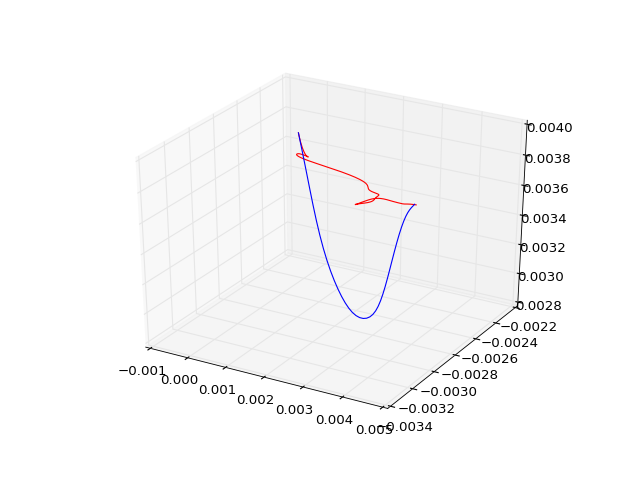

In [59]:
k = 0

fig1 = plt.figure()
ax1 = fig1.gca(projection='3d')
ax1.plot(dmp_roll[k].pos_roll[:,0],dmp_roll[k].pos_roll[:,1],dmp_roll[k].pos_roll[:,2],'r')
ax1.plot(pos_roll[k][:,0],pos_roll[k][:,1],pos_roll[k][:,2],'b')
plt.show()

<IPython.core.display.Javascript object>


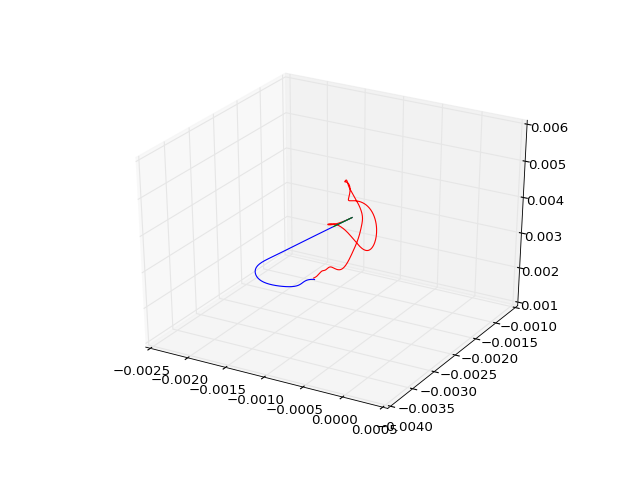

In [61]:
k = 1

fig1 = plt.figure()
ax1 = fig1.gca(projection='3d')
ax1.plot(dmp_roll[k].pos_roll[:,0],dmp_roll[k].pos_roll[:,1],dmp_roll[k].pos_roll[:,2],'r')
ax1.plot(pos_roll[k][:,0],pos_roll[k][:,1],pos_roll[k][:,2],'b')
ax1.plot(pos_roll[k][:2,0],pos_roll[k][:2,1],pos_roll[k][:2,2],'g')
plt.show()

<IPython.core.display.Javascript object>


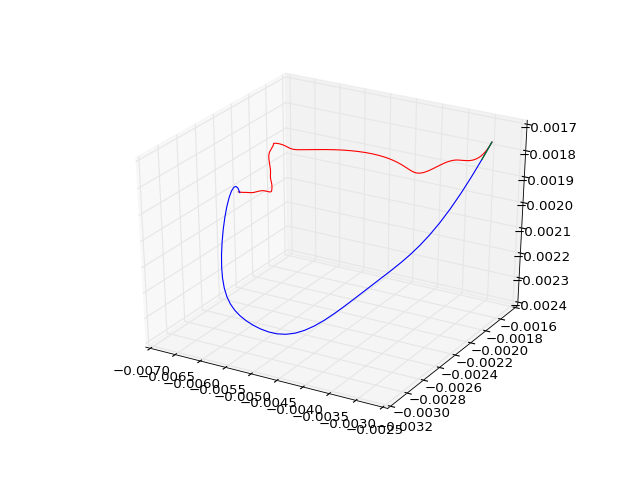

In [62]:
k = 2

fig1 = plt.figure()
ax1 = fig1.gca(projection='3d')
ax1.plot(dmp_roll[k].pos_roll[:,0],dmp_roll[k].pos_roll[:,1],dmp_roll[k].pos_roll[:,2],'r')
ax1.plot(pos_roll[k][:,0],pos_roll[k][:,1],pos_roll[k][:,2],'b')
ax1.plot(pos_roll[k][:2,0],pos_roll[k][:2,1],pos_roll[k][:2,2],'g')
plt.show()

<IPython.core.display.Javascript object>


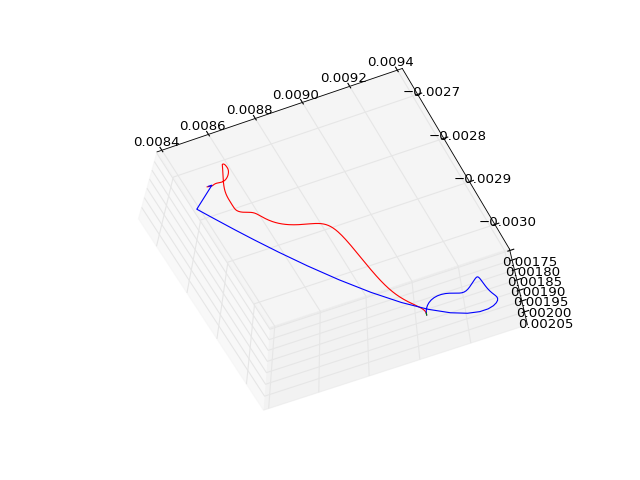

In [63]:
k = 3

fig1 = plt.figure()
ax1 = fig1.gca(projection='3d')
ax1.plot(dmp_roll[k].pos_roll[:,0],dmp_roll[k].pos_roll[:,1],dmp_roll[k].pos_roll[:,2],'r')
ax1.plot(pos_roll[k][:,0],pos_roll[k][:,1],pos_roll[k][:,2],'b')
ax1.plot(pos_roll[k][:2,0],pos_roll[k][:2,1],pos_roll[k][:2,2],'g')
plt.show()

<IPython.core.display.Javascript object>


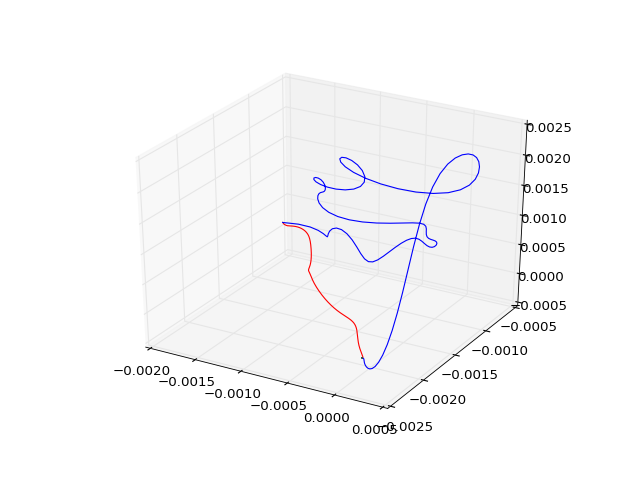

In [64]:
k = 4

fig1 = plt.figure()
ax1 = fig1.gca(projection='3d')
ax1.plot(dmp_roll[k].pos_roll[:,0],dmp_roll[k].pos_roll[:,1],dmp_roll[k].pos_roll[:,2],'r')
ax1.plot(pos_roll[k][:,0],pos_roll[k][:,1],pos_roll[k][:,2],'b')
ax1.plot(pos_roll[k][:2,0],pos_roll[k][:2,1],pos_roll[k][:2,2],'g')
plt.show()

<IPython.core.display.Javascript object>


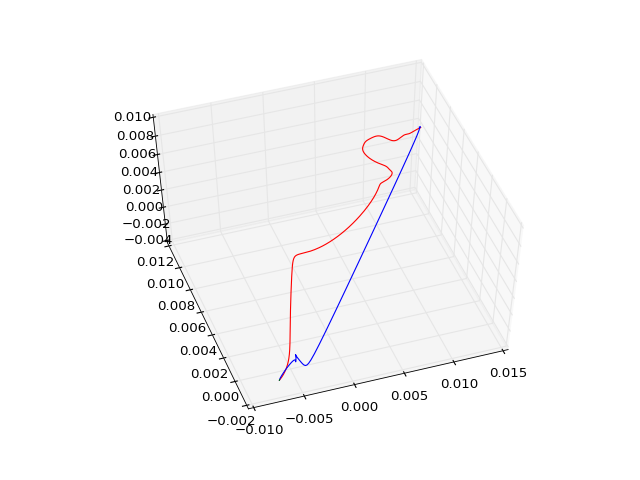

In [65]:
k = 5

fig1 = plt.figure()
ax1 = fig1.gca(projection='3d')
ax1.plot(dmp_roll[k].pos_roll[:,0],dmp_roll[k].pos_roll[:,1],dmp_roll[k].pos_roll[:,2],'r')
ax1.plot(pos_roll[k][:,0],pos_roll[k][:,1],pos_roll[k][:,2],'b')
ax1.plot(pos_roll[k][:2,0],pos_roll[k][:2,1],pos_roll[k][:2,2],'g')
plt.show()

<IPython.core.display.Javascript object>


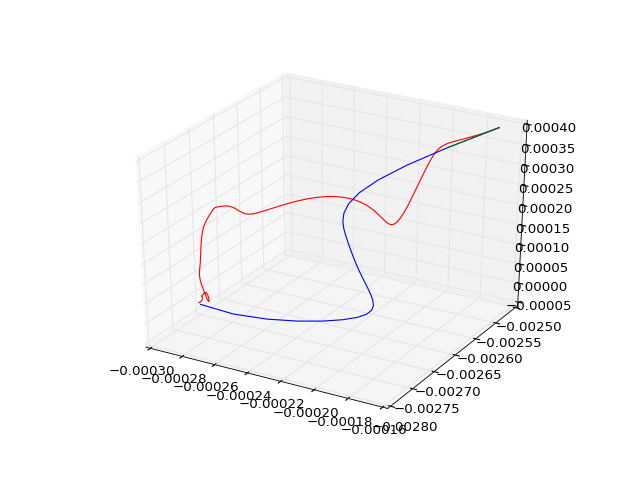

In [66]:
k = 6

fig1 = plt.figure()
ax1 = fig1.gca(projection='3d')
ax1.plot(dmp_roll[k].pos_roll[:,0],dmp_roll[k].pos_roll[:,1],dmp_roll[k].pos_roll[:,2],'r')
ax1.plot(pos_roll[k][:,0],pos_roll[k][:,1],pos_roll[k][:,2],'b')
ax1.plot(pos_roll[k][:2,0],pos_roll[k][:2,1],pos_roll[k][:2,2],'g')
plt.show()